In [ ]:
# 데이터 확인
# nan,0,타입, 데이터 간격
# df.describe()
# df.info()
# 결과값의 파악 : df['연봉(2018)']
# subplots
# hist 그래프 출력
# 각각 피쳐간 상관관계: corr, hitmap
# 피쳐간 관계: 비슷한 피쳐는 삭제
# 각각 피쳐를 출력: subplots - 각각 데이터 분포 파악
# (0 데이터가 어느정도 있는지, 데이터 분포가 어떻게 되는지)

# 결과값 파악

In [9]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor # 회귀-예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows 사용자
# matplotlib.rcParams['font.family'] = 'Apple Gothic' # Mac 사용자
matplotlib.rcParams['font.size'] = 10 # 글자크기

In [10]:
df = pd.read_csv('../z20_data/picher_stats_2017.csv')
df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [11]:
df['연봉(2018)'].sort_values()

103      2700
93       2700
115      2700
82       2800
105      2800
        ...  
4      111000
20     120000
1      120000
0      140000
2      230000
Name: 연봉(2018), Length: 152, dtype: int64

<Axes: >

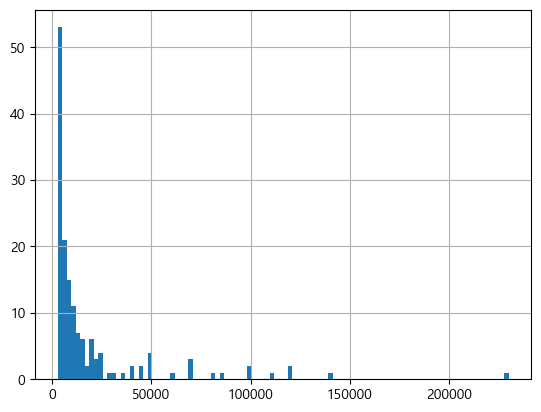

In [12]:
# 연봉 그래프
df['연봉(2018)'].hist(bins=100)

<Axes: >

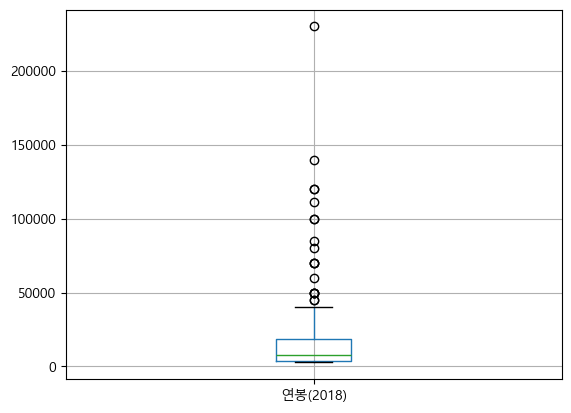

In [13]:
# 주식거래
df.boxplot(column= ['연봉(2018)'])

In [14]:
df_features_df = df.iloc[:,2:]

In [15]:
df_features_df.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

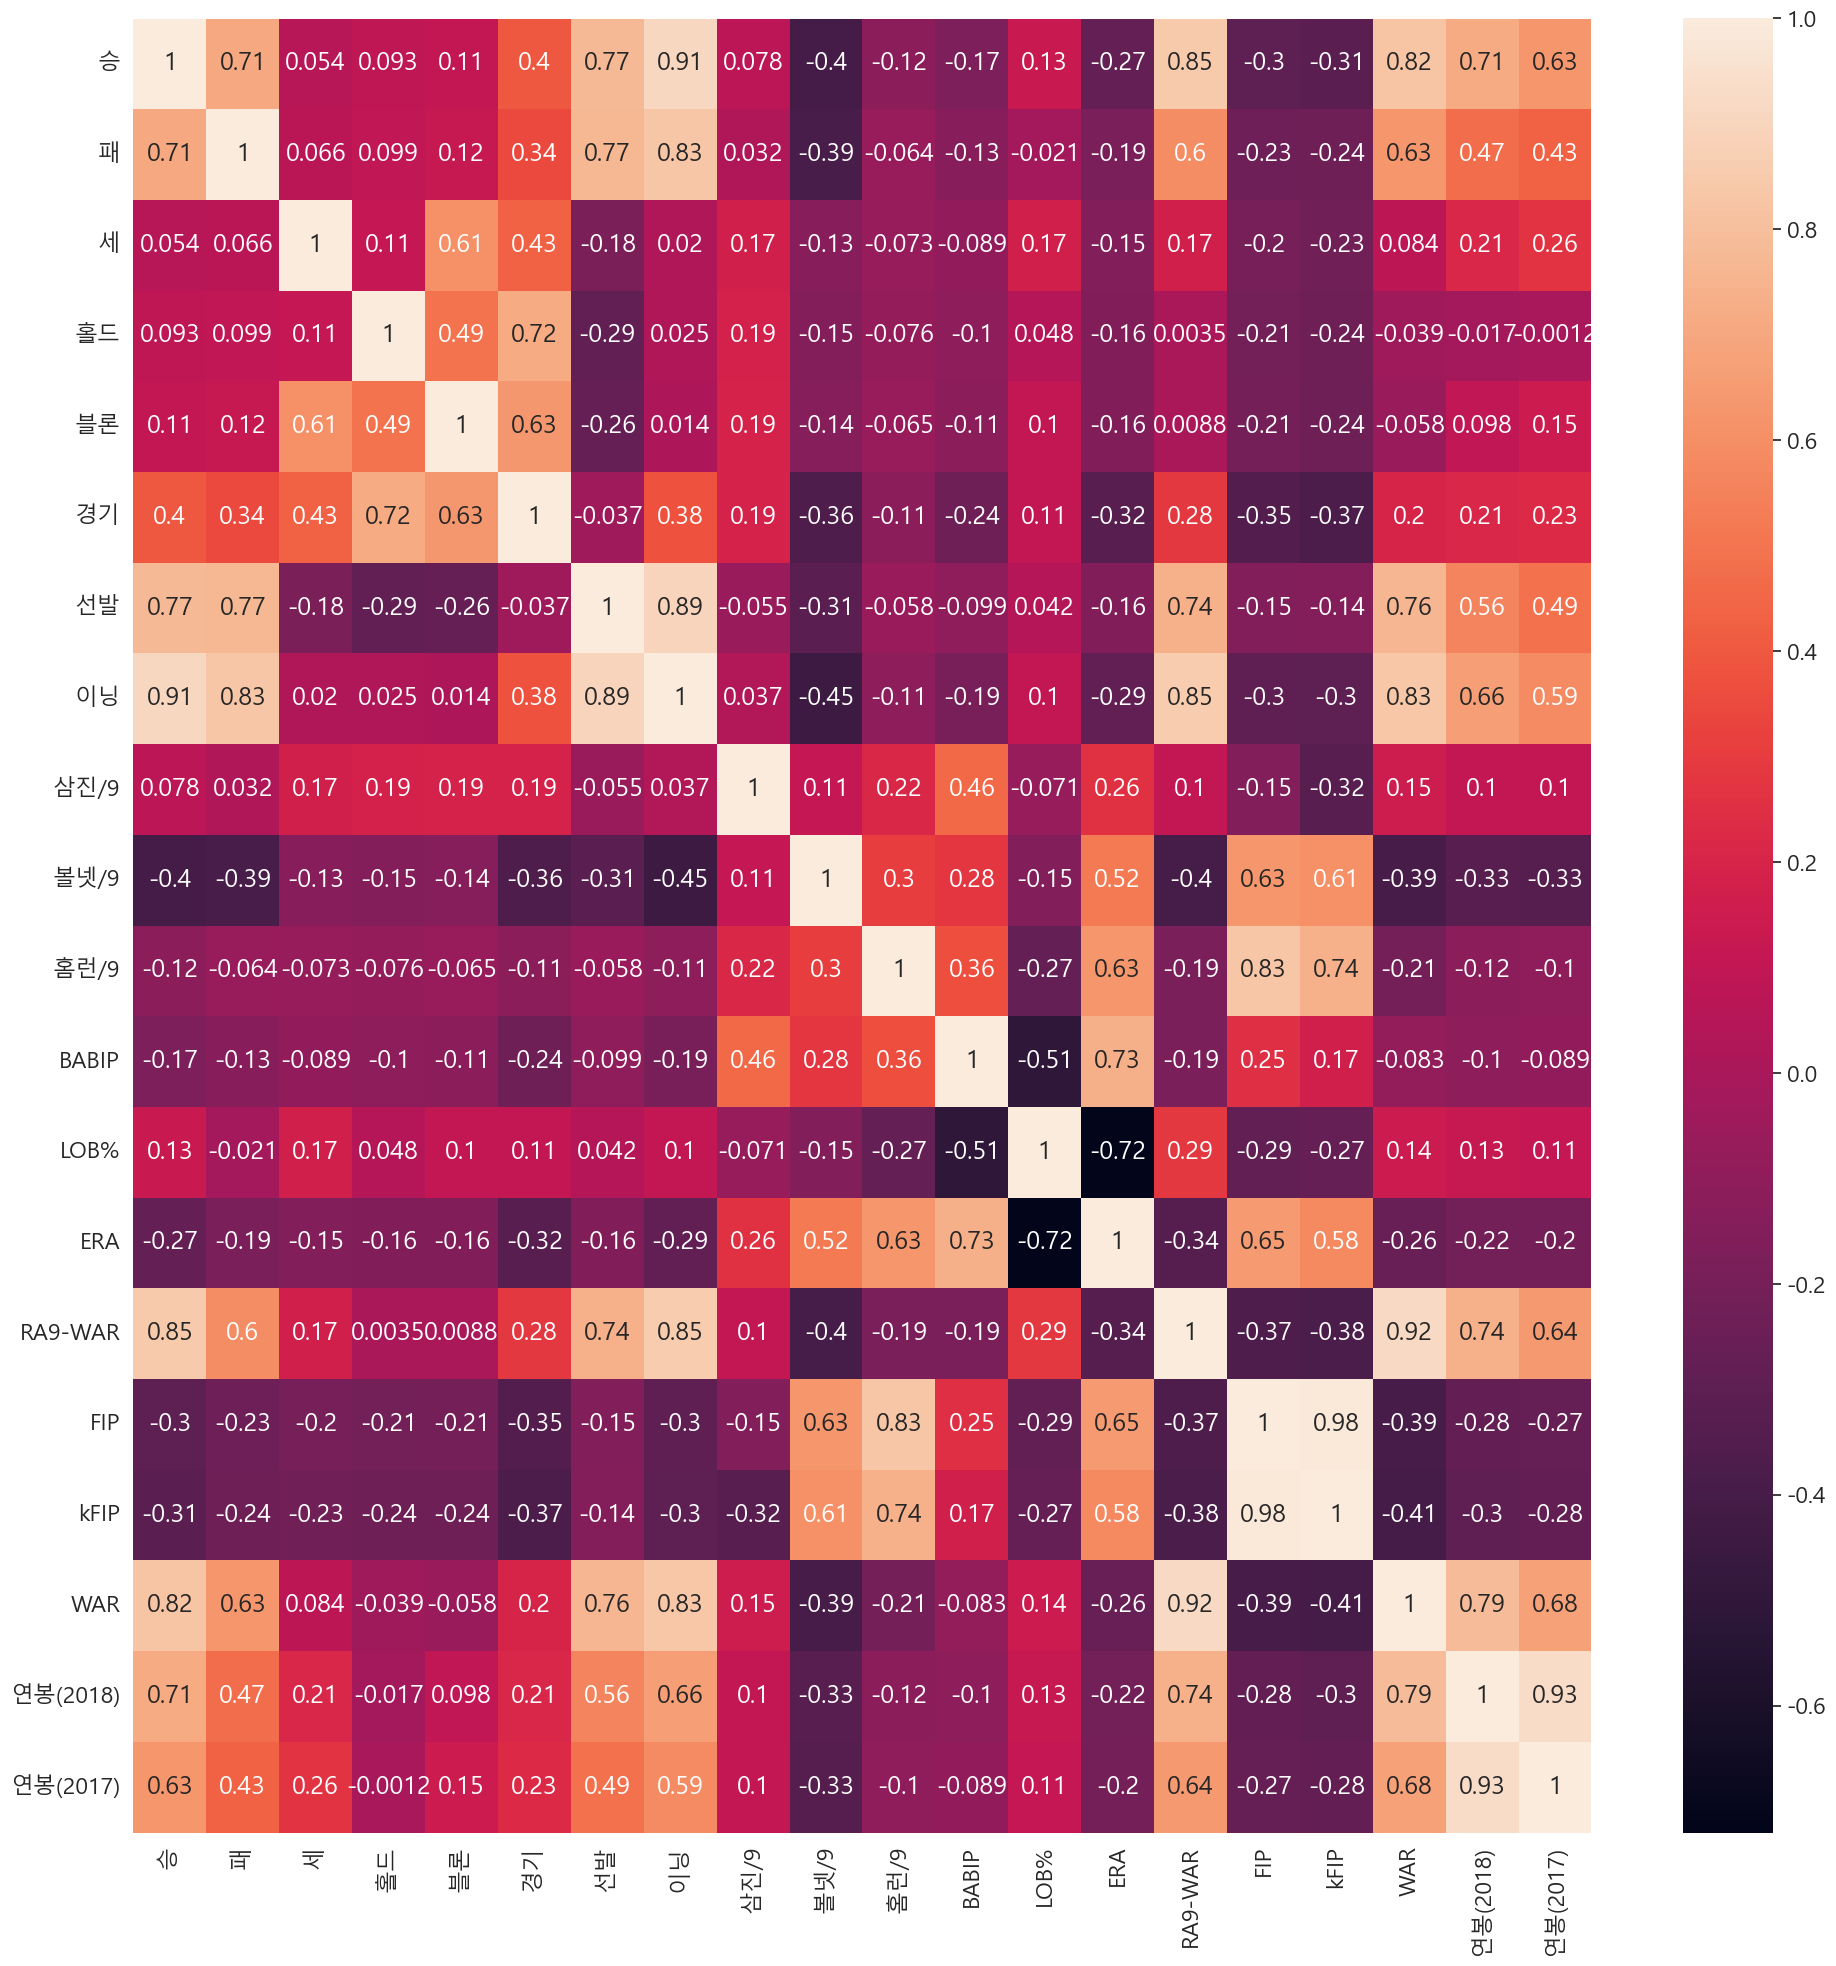

In [33]:
import seaborn as sns
# method: pearson,kendall,spearman
corr = df_features_df.corr(method='pearson')
show_cols = df_features_df.columns
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows 사용자
plt.figure(figsize=(20,20))
# sns.set(font_scale=1.5)
sns.heatmap(corr.values,
            annot=True,
            yticklabels=show_cols,
            xticklabels=show_cols
            )
plt.tight_layout()
plt.show()

In [34]:
# 함수 사용해서 각각 그래프 출력
def plot_hist_each_column(df):
    # plt.figure(figsize=(20,20))
    plt.rcParams['figure.figsize'] = [30,30]
    fig = plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]],bins=50) # bins: 그래프 폭
        ax.set_title(df.columns[i]) # 컬럼명을 타이틀로 사용

In [ ]:
# subplot 여러개의 hist 출력(5*5)
# fig,axs = plt.subplots

# subplots, subplot, add_subplot, subplot2grid

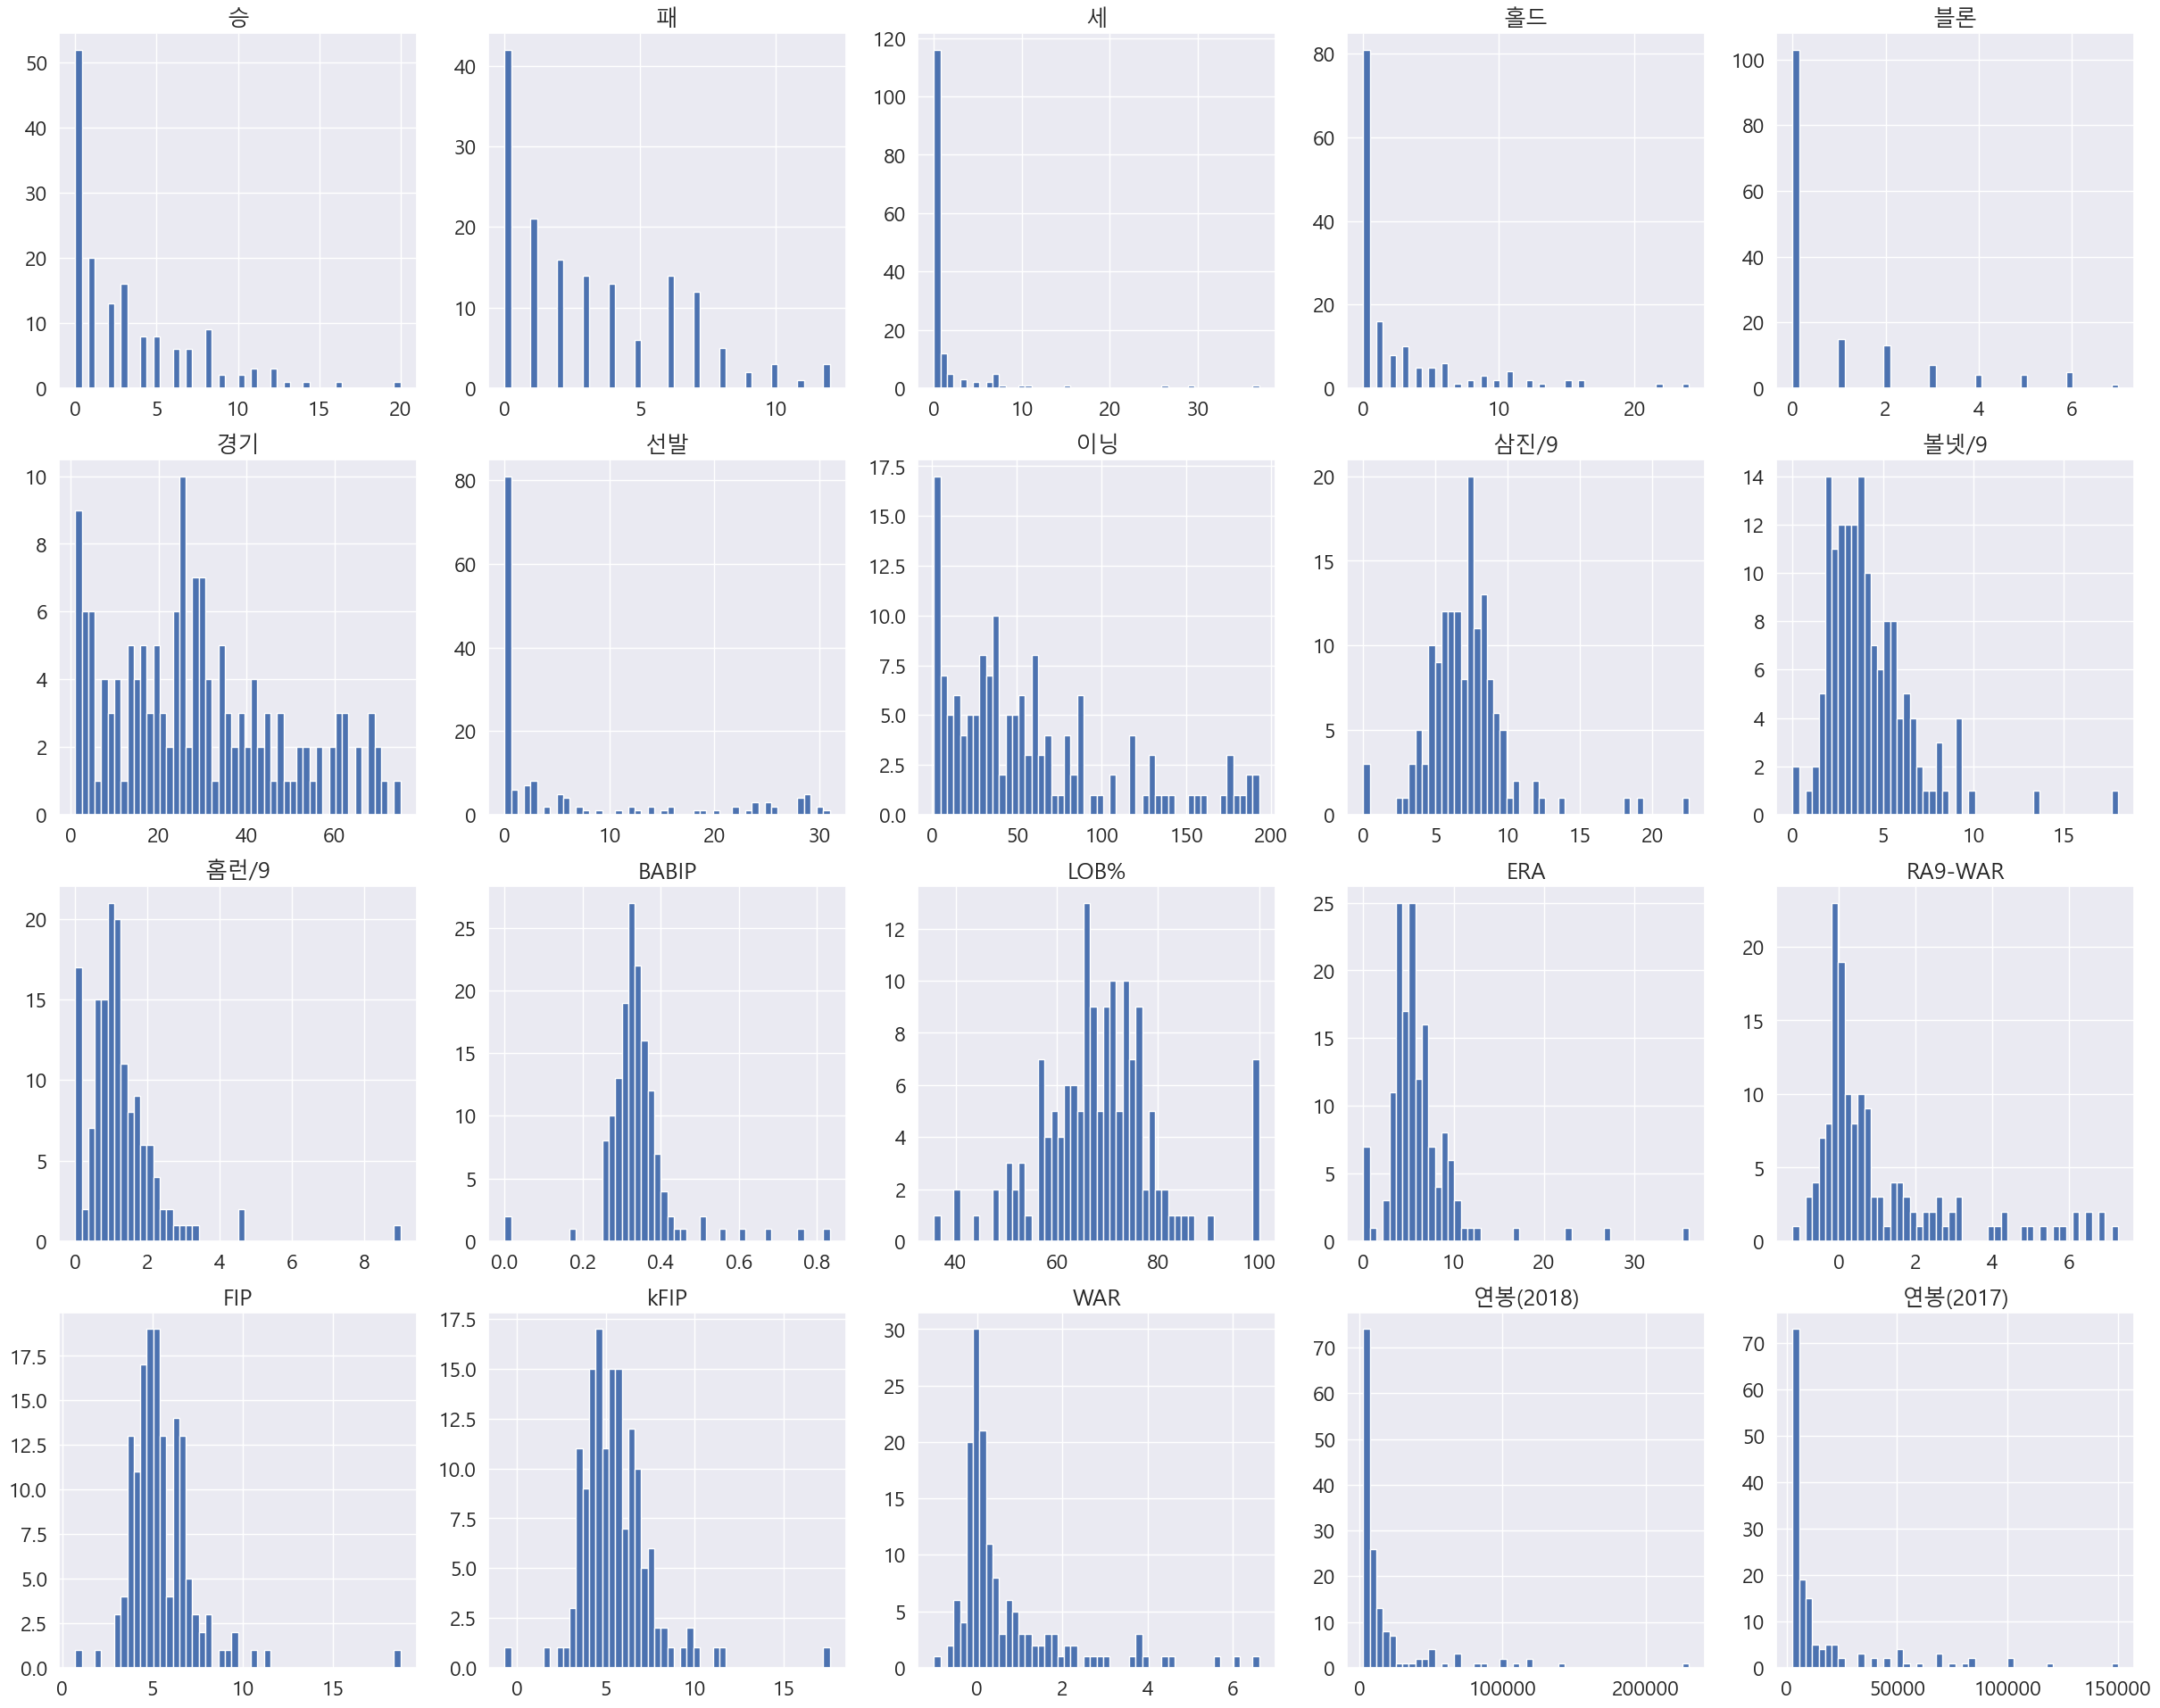

In [35]:
plot_hist_each_column(df_features_df)

In [32]:
#---------------------------데이터 확인---------------------------------#

In [37]:
# df - 모든 컬럼 존재
# df_features_df - 선수명, 팀명 제외
# df_features : 연봉(2018), 선수명, 팀명 제외

# 데이터 전처리
# 이름,팀명 분리 -
df_result = df['연봉(2018)']
df_result

df_features = df_features_df.drop('연봉(2018)',axis=1)
df_features



,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


In [ ]:
# train_input,test_input,train_target,test_target = train_test_split(
#     df_features,df_result,random_state=42
# )

In [ ]:
# 팀명 빠져있음.

In [40]:
# 표준화 작업
# df_features_scaled : 선수명, 팀명, 연봉(2018) 제외, 표준화작업 완료상태
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df_features)
df_features_scaled = ss.transform(df_features)

In [44]:
df_numpy = pd.DataFrame(df_features_scaled)
df_numpy.columns = df_features.columns
df_numpy.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746


In [46]:
# 선수명, 팀명 합치기
df_features_scaled_name = pd.concat([df.iloc[:,:2],df_numpy],axis=1)
df_features_scaled_name

# df: 모든 컬럼 존재
# df_result: 연봉(2018)
# df_features_df: 선수명, 팀명 제외
# df_features: 연봉(2018), 선수명, 팀명 제외
# df_features_scaled: 선수명, 팀명, 연봉(2018) 제외, 표준화 작업 완료상태
# df_features_scaled_name: 선수명,팀명 포함 표준화 작업 완료

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,켈리,SK,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,...,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,소사,LG,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,...,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,양현종,KIA,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,...,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,차우찬,LG,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,...,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,레일리,롯데,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,...,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,...,-0.375064,0.365057,0.163412,-1.006027,0.412709,-1.233602,0.377052,0.477566,-0.861951,-0.336696
148,정용운,KIA,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,...,0.605813,-0.147905,-0.873882,-0.270312,-0.030353,-0.362917,0.484298,0.624396,-0.877127,-0.536985
149,노경은,롯데,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,...,0.308578,1.223282,0.467836,-1.360901,1.351808,-1.026814,1.352985,1.393990,-0.968185,-0.020240
150,김승현,삼성,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,...,1.200284,0.226952,0.005563,0.465402,-0.066472,-0.792818,0.730962,0.715532,-1.036478,-0.544996


In [61]:
df_features_scaled = pd.DataFrame(df_features_scaled)
df_features_scaled.columns = df_features.columns
df_features_scaled

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,-0.972099,-0.375064,0.365057,0.163412,-1.006027,0.412709,-1.233602,0.377052,0.477566,-0.861951,-0.336696
148,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,-0.780490,0.605813,-0.147905,-0.873882,-0.270312,-0.030353,-0.362917,0.484298,0.624396,-0.877127,-0.536985
149,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,-0.759200,0.308578,1.223282,0.467836,-1.360901,1.351808,-1.026814,1.352985,1.393990,-0.968185,-0.020240
150,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,0.205943,1.200284,0.226952,0.005563,0.465402,-0.066472,-0.792818,0.730962,0.715532,-1.036478,-0.544996


In [77]:
df_features_scaled.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)',
       'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

In [62]:
# 원핫인코딩 후 팀명을 추가
# df['팀명']
team_encoding = pd.get_dummies(df['팀명'])
team_encoding
# df_features_scaled: 선수명,연봉(2018) 제외, 표준화 작업 완료상태
df_features_scaled = df_features_scaled.join(team_encoding)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(
    df_features_scaled,df_result,random_state=42
)

In [53]:
#----------------------------데이터 전처리---------------------------------#

In [64]:
# 데이터 학습하기
lr = LinearRegression()
lr.fit(train_input,train_target)


LinearRegression()

In [65]:
print(lr.coef_)

[  4275.70472857   -733.92522229   -443.71316901  -1127.16218213
    999.02769204  -4688.22078678 -12287.99794284  10287.9892736
   3066.41059196   5588.04678352  12438.88289024  -2016.26394952
    643.39847158   1936.15651647  -1099.53028955 -67976.86463099
  57700.61368947  12156.18593342  21312.23273105   7353.91637876
   2303.85227188  -1512.97388733  -1341.43843238   -103.79901464
  -4227.6868152    -618.43449436  -4148.53556228   2295.09955555]


In [66]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9344519586230713
0.733012158768199


In [ ]:
# 비슷한 컬럼을 제거
# 상관관계 높은 것은 제거해서 다시 훈련모델을 실행
# 더 좋은 성능의 모델을 구현

In [ ]:
# degree 형태를 늘려서 테스트
# 규제 잘 안됨.

# 컬럼을 조정해서 테스트

In [69]:
# 평가 statsmodels
import statsmodels.api as sm

train_input = sm.add_constant(train_input)
model = sm.OLS(train_target.astype(int),train_input.astype(int)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     37.02
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.50e-36
Time:                        16:53:48   Log-Likelihood:                -1206.4
No. Observations:                 114   AIC:                             2469.
Df Residuals:                      86   BIC:                             2545.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5289.1414   1463.023      3.615      0.001    2380.748    8197.535
승           1.077e+04   3503.233      3.076      0.003    3810.162    1.77e+04
패           -924.7645   2364.078     -0.391      0.697   -5624.396    3774.867
세           1252.7695   2082.832      0.601      0.549   -2887.764    5393.303
홀드          5953.5895   3121.761      1.907      0.060    -252.267    1.22e+04
블론          3429.3330   2085.444      1.644      0.104    -716.392    7575.058
경기         -1060.5086   2541.532     -0.417      0.678   -6112.906    3991.889
선발          6007.9599   5587.184      1.075      0.285   -5098.995    1.71e+04
이닝          1187.1718   4533.587      0.262      0.794   -7825.301    1.02e+04
삼진/9       -1457.5031   2891.143     -0.504      0.615   -7204.905    4289.898
볼넷/9        1020.3844   2704.607      0.377      0.707   -4356.197    6396.966
홈런/9        4331.3984   3448.096      1.256      0.212   -2523.189    1.12e+04
BABIP      -1164.2421   2807.458     -0.415      0.679   -6745.283    4416.799
LOB%        -269.1870   2343.994     -0.115      0.909   -4928.892    4390.518
ERA          604.6003   3319.071      0.182      0.856   -5993.495    7202.695
RA9-WAR    -5190.2061   4088.779     -1.269      0.208   -1.33e+04    2938.017
FIP        -7678.9940   4884.750     -1.572      0.120   -1.74e+04    2031.567
kFIP        1407.3149   4834.684      0.291      0.772   -8203.720     1.1e+04
WAR         1.297e+04   3268.504      3.968      0.000    6473.042    1.95e+04
연봉(2017)    2.293e+04   1940.057     11.822      0.000    1.91e+04    2.68e+04
KIA         3311.5601   3535.534      0.937      0.352   -3716.848    1.03e+04
KT          1174.5570   2895.655      0.406      0.686   -4581.814    6930.928
LG          -949.7329   3253.109     -0.292      0.771   -7416.699    5517.233
NC          2613.7900   3519.223      0.743      0.460   -4382.194    9609.774
SK         -2237.9774   3278.584     -0.683      0.497   -8755.587    4279.632
두산         -3588.9324   3581.206     -1.002      0.319   -1.07e+04    3530.269
롯데         -2133.0497   3457.837     -0.617      0.539   -9007.003    4740.903
삼성          -843.8578   2866.489     -0.294      0.769   -6542.249    4854.533
한화          7942.7846   3000.586      2.647      0.010    1977.818    1.39e+04
==============================================================================
Omnibus:                       17.021   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.802
Skew:                           0.276   Prob(JB):                     2.31e-14
Kurtosis:                       6.594   Cond. No.                     1.74e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

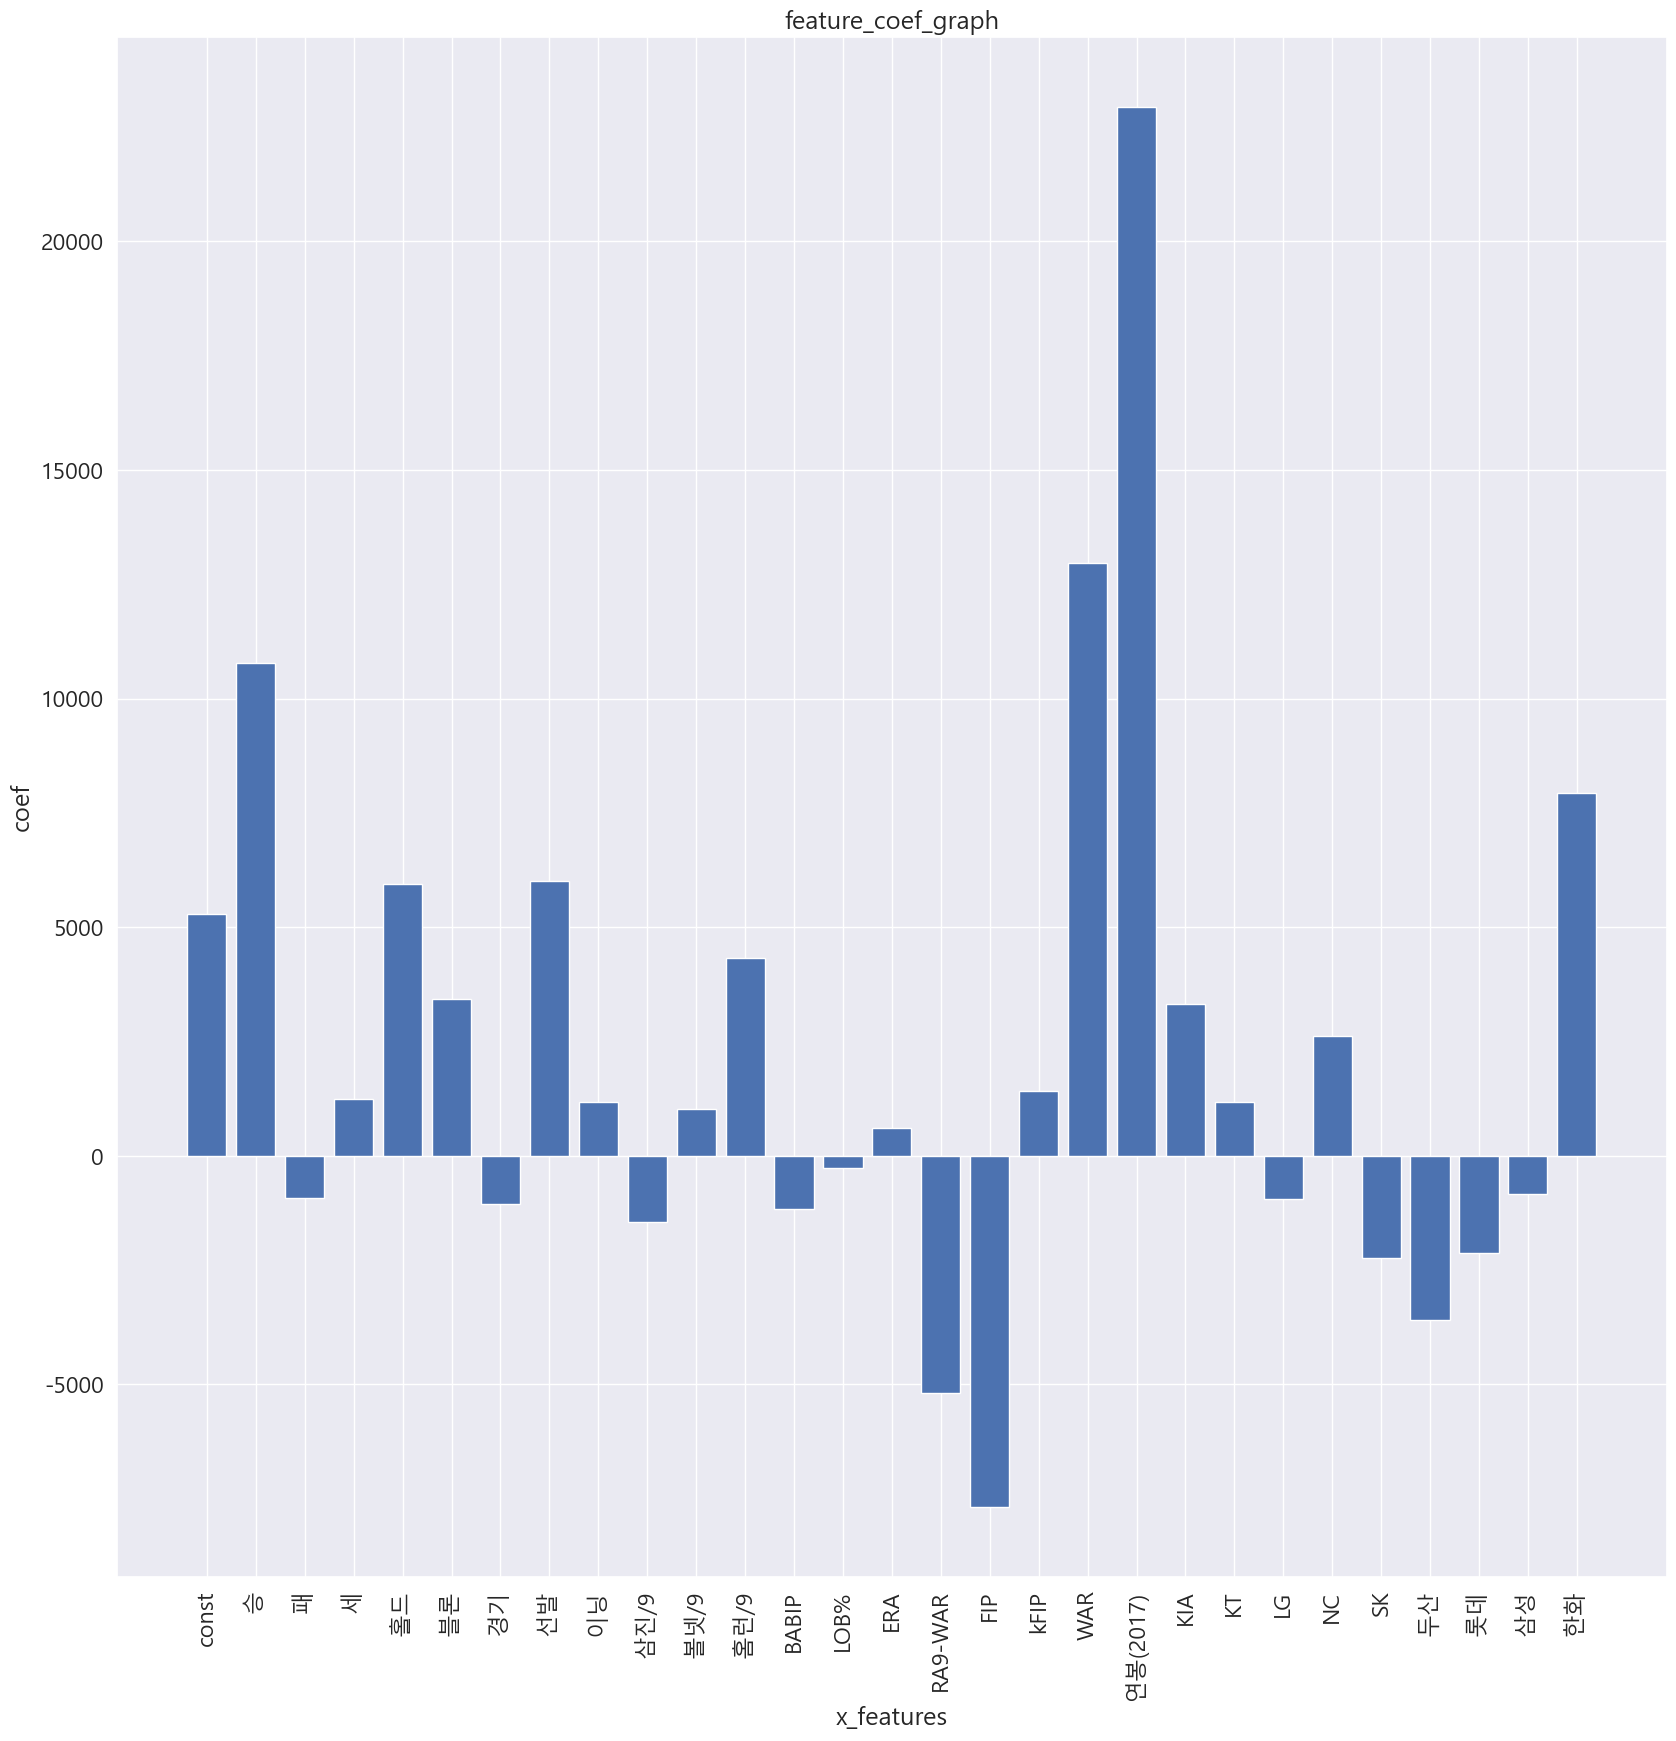

In [74]:
# 평가서를 그래프 출력
plt.figure(figsize=(20,20))
# 회귀 계수 - 기울기
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)
coefs_series

# 변수명 - 특성이름
x_labels = model.params.index.tolist()

# 그래프 출력
plt.bar(x_labels,coefs_series)
plt.xticks(rotation=90)
plt.title('feature_coef_graph')
plt.xlabel('x_features')
plt.ylabel('coef')

plt.show()

In [94]:
# 회귀분석 예측 - 고려사항 체크
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# 각 피쳐마다 VIF 계수 출력
# target 어느정도 영향을 가했는지 확인
# 값이 높은것은, 결과 예측에 많은 영향을 미쳤다라고 판단
vif = pd.DataFrame() # 선언
vif['VIF Factor'] = [ variance_inflation_factor(df_features_scaled.values.astype(float),i)for i in range(df_features_scaled.shape[1])]
vif['features'] = df_features_scaled.columns
vif.round(1)

,VIF Factor,features
0,8.0,승
1,5.9,패
2,3.1,세
3,3.8,홀드
4,3.0,블론
5,14.6,경기
6,39.6,선발
7,63.8,이닝
8,89.5,삼진/9
9,57.8,볼넷/9


In [96]:
# ['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']
# 선형회귀 모델을 다시 실행해 보시오.
# print(df_features_scaled.columns)
# print(df_result)
new_df = df_features_scaled[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
new_df
df_result.head()

0    140000
1    120000
2    230000
3    100000
4    111000
Name: 연봉(2018), dtype: int64

In [97]:
train_scaled,test_scaled,train_target,test_target = train_test_split(
    new_df,df_result,random_state=42
)
train_scaled.head(2)

,FIP,WAR,볼넷/9,삼진/9,연봉(2017)
55,-0.314681,-0.216960,0.134482,0.890768,0.660742
27,-0.588156,0.541852,-0.481220,0.596258,-0.020240


In [98]:
# 데이터 실습시키기
lr = LinearRegression()
lr.fit(train_scaled,train_target)

LinearRegression()

In [99]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9184173535558415
0.8643487494511758


In [100]:
df_features_scaled.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)',
       'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

In [102]:
df_yy_scaled_df = df_features_scaled.drop(['RA9-WAR','kFIP'],axis=1)
df_yy_scaled_df.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'FIP', 'WAR', '연봉(2017)', 'KIA', 'KT', 'LG',
       'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

In [105]:
pre_df = df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
pre_df.head()

,FIP,WAR,볼넷/9,삼진/9,연봉(2017)
0,3.69,6.62,2.13,8.95,85000
1,3.52,6.08,1.85,7.43,50000
2,3.94,5.64,2.09,7.36,150000
3,4.20,4.63,1.95,8.04,100000
4,4.36,4.38,2.11,7.49,85000


In [107]:
# 데이터 예측하기
pre_2018 = lr.predict(pre_df)

In [108]:
df['예측연봉(2018)'] = pd.Series(pre_2018)

In [109]:
df.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)', '예측연봉(2018)'],
      dtype='object')

In [112]:
# 작년연봉, 예측연봉, 실제연봉 출력
df[['선수명','팀명','연봉(2017)','예측연봉(2018)','연봉(2018)']]

,선수명,팀명,연봉(2017),예측연봉(2018),연봉(2018)
0,켈리,SK,85000,1.895692e+09,140000
1,소사,LG,50000,1.115145e+09,120000
2,양현종,KIA,150000,3.345263e+09,230000
3,차우찬,LG,100000,2.230190e+09,100000
4,레일리,롯데,85000,1.895670e+09,111000
...,...,...,...,...,...
147,장민재,한화,8100,1.806576e+08,7100
148,정용운,KIA,3100,6.915332e+07,7500
149,노경은,롯데,16000,3.568386e+08,10000
150,김승현,삼성,2900,6.468860e+07,4000
